<h1 align=center><font size=7>Time Series</font></h1>


# Part 1: Getting started

## What is time series?

Time series is a series of data points with timestamps.

Time series is different from classical machine learning data: 
+ The timestamps define an order.
+ Observations are usually not independent to each other.

Time series analysis or descriptive modeling tries to find the causes to understand the data.

Forecasting modeling tries to predict the future using historical data.

## Time series' components

A time series often has the components below:

+ Level: the value of the series if it is constant
+ Noise: unpredictable variation of the series
+ Trend: often refers to the linear increasing or decreasing tendencies of the series
+ Seasonality: Some repeating patterns in the series

## A time series 

Task: 
+ Download the [Arctic oscillation (AO)](https://en.wikipedia.org/wiki/Arctic_oscillation) data from http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
+ Load the data into a numpy array, display the shape and some first lines of the data.


In [0]:
import numpy as np

In [183]:
# use "np.loadtxt" to load the Arctic oscillation data (without downloading the file)

data = np.loadtxt(fname = "http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii")

print('Data shape :', data.shape)
data

Data shape : (838, 3)


array([[ 1.9500e+03,  1.0000e+00, -6.0310e-02],
       [ 1.9500e+03,  2.0000e+00,  6.2681e-01],
       [ 1.9500e+03,  3.0000e+00, -8.1275e-03],
       ...,
       [ 2.0190e+03,  8.0000e+00, -7.2177e-01],
       [ 2.0190e+03,  9.0000e+00,  3.0620e-01],
       [ 2.0190e+03,  1.0000e+01, -8.2195e-02]])

There are 3 values for each observations, the first one is the year, the second one is the month, the third one is the AO index.

We can create the timestamp starting from 1950-01 as follows: 

In [184]:
import pandas as pd
dates = pd.date_range('1950-01', periods=data.shape[0], freq='M')
print(dates)
print(dates.shape)

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', length=838, freq='M')
(838,)


We then create a series of "AO index" indexed by the above timestamp, and plot the data:

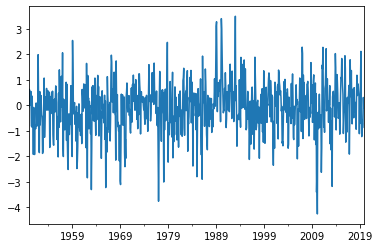

In [185]:
# Replace "ao" by your numpy array
AO = pd.Series(data[:,2], index=dates)
AO.plot()

We can also choose a period of time using timestamp:

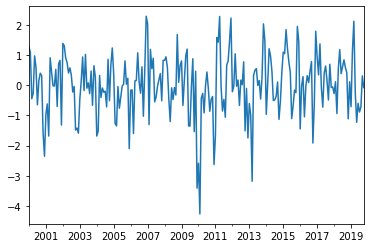

In [186]:
AO['2000':].plot()

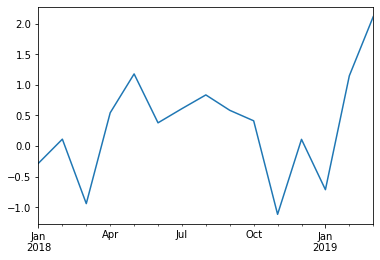

In [187]:
AO['2018-01':'2019-03'].plot()

## Statistics

Compute some statistics of the above data:

In [188]:
# Mean and variance
AO.mean(), AO.var()

(-0.1065020072911694, 1.0000315780546296)

In [189]:
# Use the describe method
AO.describe()

count    838.000000
mean      -0.106502
std        1.000016
min       -4.265700
25%       -0.651515
50%       -0.039931
75%        0.481393
max        3.495300
dtype: float64

## Rolling statistics

Let's say for each observation you want to compute the average of the 12 most recent observations. We can do this with the "rolling" method of pandas:



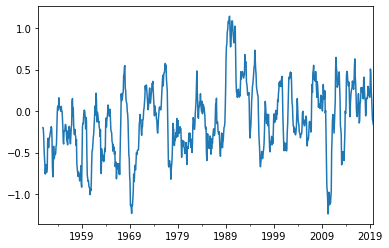

In [190]:
AO.rolling(window=12, center=False).mean().plot()

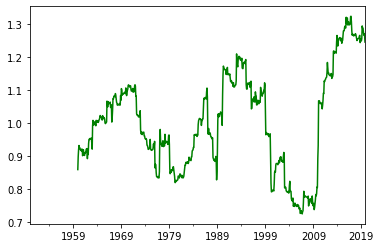

In [191]:
# rolling variance
AO.rolling(window=120).var().plot(style='-g')

Let see the new sequence the code gives:

In [192]:
rolling_mean = AO.rolling(window=3, center=False).mean()
rolling_mean[:10]

1950-01-31         NaN
1950-02-28         NaN
1950-03-31    0.186124
1950-04-30    0.391261
1950-05-31    0.206183
1950-06-30    0.388416
1950-07-31   -0.064111
1950-08-31   -0.371640
1950-09-30   -0.431840
1950-10-31   -0.290647
Freq: M, dtype: float64

As we see, when `center=False`, the code computes the mean of the 3 most recent examples including the current example itself.

In [193]:
rolling_mean = AO.rolling(window=3, center=True).mean()
rolling_mean

1950-01-31         NaN
1950-02-28    0.186124
1950-03-31    0.391261
1950-04-30    0.206183
1950-05-31    0.388416
                ...   
2019-06-30   -0.907427
2019-07-31   -0.737583
2019-08-31   -0.435087
2019-09-30   -0.165922
2019-10-31         NaN
Freq: M, Length: 838, dtype: float64

When `center=True`, the code computes the mean of 3 continuous examples where the current example is at the center.

## Resampling

A time series can be given at a too high frequency or unevenly spaced. Some models require resampling the data. 

"pandas" provides us an easy way to resample the data. We need to decide the period and the resampling method.

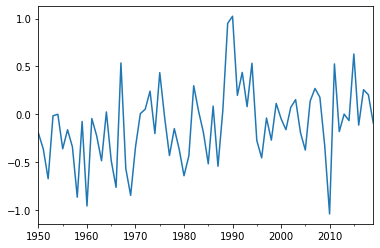

In [194]:
# Here "A" means Annual
AO_rs = AO.resample("A").mean()
AO_rs.plot()

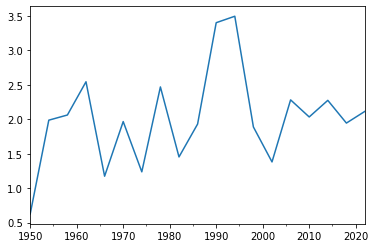

In [195]:
# 4 year, using np.max
AO_rs = AO.resample("4A").apply(np.max)
AO_rs.plot()

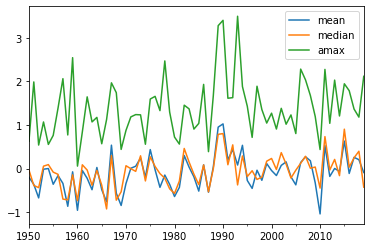

In [196]:
# Resampling with several functions at once
AO_rs = AO.resample("A").apply(['mean', 'median', np.max])
AO_rs['1900':'2020'].plot()

In [197]:
AO_rs.head()

,mean,median,amax
1950-12-31,-0.199501,-0.034219,0.62681
1951-12-31,-0.364626,-0.388670,1.98720
1952-12-31,-0.674990,-0.439050,0.53852
1953-12-31,-0.016515,0.053747,1.06830
1954-12-31,-0.000770,0.089545,0.55259


## Model evaluation

We can evaluate a forecasting model using metrics like R squared, mean squared error (MSE), mean absolute error (MAE), median absolute error (MedAE), etc.

Descriptive models are evalutated by how well they describe the data.

## Cross-validation for time series

Because the data is not independent, we need to do cross validation differently.

Train with all the data from time 0 to time t included. Test with data from t+1 to t+n. 
Train with data from time 0 to time t+n, and test with data from t+n+1 to t+2n.
Proceed accordingly.

In other words, for k=1,2,...,K, train with data from time 0 to time t+(k-1)n included. Test with data from t+(k-1)n+1 to t+kn.



# Part 2: Smoothing

Smoothing techniques smoothe the series so that we can see the trends. It can also be used to forecast.

### Moving average
The prediction of the next value is the average of last k values.

Task:
+ Get the series minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia ("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"). 
+ For each date, compute the average of the last 4 days excluding the current date.
+ Plot the series and the prediction
+ Try different values of window width (number of days)
+ Comment the result

In [198]:
daily_temp = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")

print('Data shape :', daily_temp.shape)

daily_temp['Date'] = pd.to_datetime(daily_temp['Date'])

print(daily_temp["Date"])

daily_temp.set_index("Date", inplace=True)

ts_daily_temp=daily_temp.iloc[:,0]
ts_daily_temp, type(ts_daily_temp)

Data shape : (3650, 2)
0      1981-01-01
1      1981-01-02
2      1981-01-03
3      1981-01-04
4      1981-01-05
          ...    
3645   1990-12-27
3646   1990-12-28
3647   1990-12-29
3648   1990-12-30
3649   1990-12-31
Name: Date, Length: 3650, dtype: datetime64[ns]


(Date
 1981-01-01    20.7
 1981-01-02    17.9
 1981-01-03    18.8
 1981-01-04    14.6
 1981-01-05    15.8
               ... 
 1990-12-27    14.0
 1990-12-28    13.6
 1990-12-29    13.5
 1990-12-30    15.7
 1990-12-31    13.0
 Name: Temp, Length: 3650, dtype: float64, pandas.core.series.Series)

### Weighted average

We may want to put more attention to the recent events.
Weighted average gives more weights to recent events, while all weights sum up to 1. 

Task:
Make prediction with the weights `[0.1, 0.2, 0.3, 0.4]`, then plot the series and the prediction.

In [199]:
def weighted_average(temp):
    return np.sum(np.array([0.1, 0.2, 0.3, 0.4])*np.array(temp))

daily_temp['Prediction'] = ts_daily_temp.rolling(window=4, center=False).apply(weighted_average)

daily_temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


,Temp,Prediction
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,17.13
1981-01-05,15.8,16.25
...,...,...
1990-12-27,14.0,13.56
1990-12-28,13.6,13.85
1990-12-29,13.5,13.74


### Exponential smoothing
All the past observations are used and the weight decays exponentially with the distance in time.

$$\hat{y}_t = \alpha y_{t-1} + (1-\alpha)\hat{y}_{t-1}\\
\hat{y}_1=y_0$$
where $y$ is the true observation, $\hat{y}$ is the prediction, and $\alpha$ is a smoothing factor.

Task: Similar to the above task but use exponential smoothing with different values of $\alpha$. 

### Double exponential smoothing
We will use 2 quantities: the level $l_t$ and the trend $b_t$. Those 2 quantities are updated using exponential smoothing.
$$
l_t = \alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1}) \\
b_t = \beta (l_t - l_{t-1}) + (1-\beta) b_{t-1} \\
\hat{y}_{t+1} = l_t + b_t
$$
where $\beta$ is the trend smoothing factor.

As you can see, double exponential smoothing is like smoothing both the series and the trend.

Task: Implement this, plot the series and the prediction from 3000th example to 3360th example using 4 different pairs of $(\alpha, \beta)$: (0.8, 0.8), (0.8, 0.2), (0.2, 0.8), (0.2, 0.2).

### Triple exponential smoothing
We add the third component, seasonality $s_t$, that explains periodic variations in the series. We need to choose the period $T$.

The equations are as follow:
$$\ell_t = \alpha(y_t - s_{t-T}) + (1-\alpha)(\ell_{t-1} + b_{t-1}) \\
b_t = \beta(\ell_t - \ell_{t-1}) + (1-\beta)b_{t-1} \\ 
s_t = \gamma(y_t - \ell_t) + (1-\gamma)s_{t-T}\\
\hat{y}_{t+m} = \ell_t + mb_t + s_{t-T+1+(m-1)modT}$$

The update of the trend doesn't change.

The update of the level changes a bit, now it considers the observation minus some seasonal component instead of the observation.

Each seasonal component is updated considering the difference between the observation and the level. Seasonal components are updated indepndently.

Now we can predict many steps in the future. As we can see, the level term is like an intercept, the trend is like a slope and the seasonal term is periodic.

### Confidence interval

We can use Brutlag method to produce confidence intervals, which will serve to detect outliers in data:

$$\hat y^{max}_t=\ell_{t−1}+b_{t−1}+s_{t−T}+m⋅d_{t−T}\\
\hat y^{min}_t=\ell_{t−1}+b_{t−1}+s_{t−T}-m⋅d_{t−T}$$

$$d_t=\gamma∣y_t−\hat y_t∣+(1−\gamma)d_{t−T},$$

Here $d_t$ is the estimated deviation.

Extra task: Implement the triple exponential smoothing and the confidence interval. 

# Part 3: Statistical/econometric approach introduction

In this part we introduce some statistical models without going too deep into all the mathenmatical details.

### Stationarity
A stationary process is a stochastic process with statistical properties that do not change when shifted in time.

A sequence of random variables $\{X_i\}_i$ is stationary if $F(X_1, X_2, ..., X_k) = F(X_{n+1}, X_{n+2}, ..., X_{n+k})$ for any positive integers $k$ and $n$, where $F$ is the joint cumulative distribution function.

An example of stationary process is a sequence of independent and identically distributed random variables $\{e_i\}_i$.

Another example: $e_1 + e_2,\ e_2 + e_3,\ e_3 + e_4,\ ...$

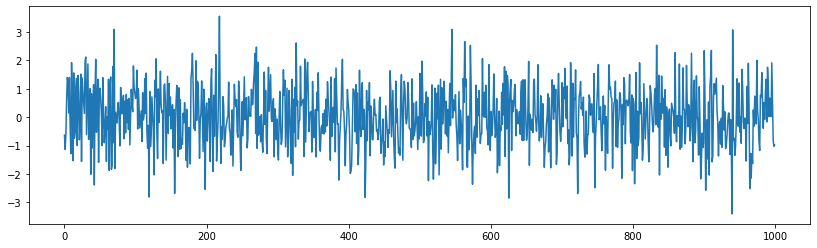

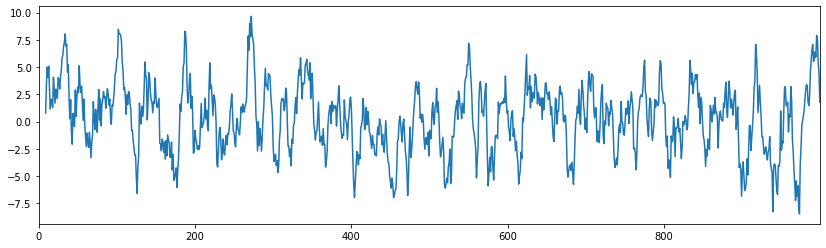

In [200]:
import matplotlib.pyplot as plt
series1 = np.random.randn(1000)

plt.figure(figsize=(14,4))
plt.plot(series1)
plt.show()

pd_series1 = pd.Series(series1)

pd_series2 = pd_series1.rolling(window=10).sum()
pd_series2.plot(figsize=(14, 4))

## Data

Download data https://trends.google.com/trends/explore?date=all&q=polution

In [0]:
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [202]:
!head -5 multiTimeline.csv

Catégorie : Toutes catégories

Mois,polution: (Dans tous les pays)
2004-01,81
2004-02,77


In [0]:
# load the downloade data
df = pd.read_csv('/content/multiTimeline.csv', sep=',',header=1)

In [204]:
df.columns

Index(['Mois', 'polution: (Dans tous les pays)'], dtype='object')

In [0]:
df.columns = ['Month', 'Polution']

In [206]:
df.head()

,Month,Polution
0,2004-01,81
1,2004-02,77
2,2004-03,94
3,2004-04,100
4,2004-05,93


In [207]:
df.describe()

,Polution
count,190.000000
mean,30.205263
std,21.130358
min,10.000000
25%,16.000000
50%,19.500000
75%,39.500000
max,100.000000


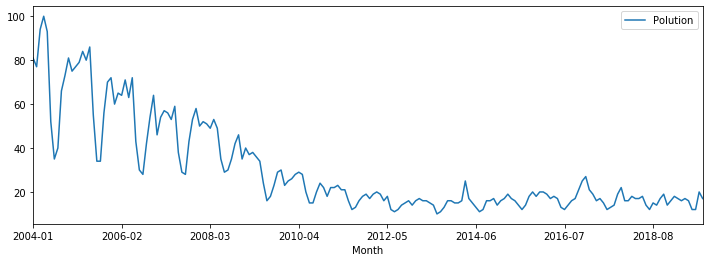

In [208]:
df.plot(x='Month', y='Polution', figsize=(12,4) )

## Detrend

To detrend a series, we minus the series with its linear regression prediction:

In [0]:
from statsmodels.tsa.tsatools import detrend

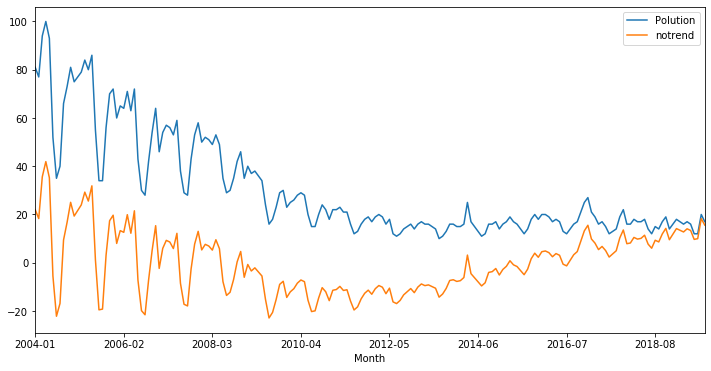

In [210]:
## detrend function returns the residual of the linear regression
notrend = detrend(df['Polution'])
df["notrend"] = notrend
df.plot(x="Month", y=['Polution', "notrend"], figsize=(12,6))

## Trend

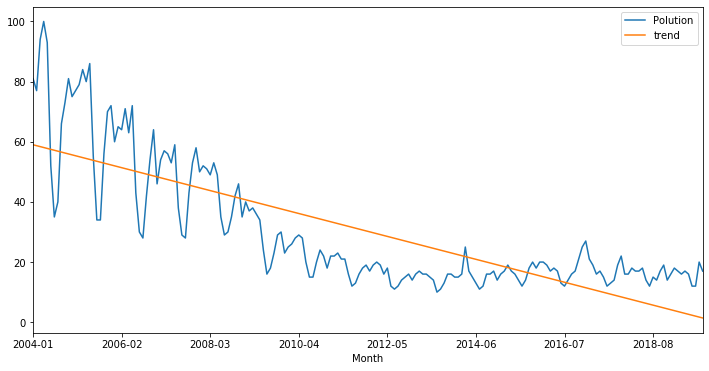

In [211]:
df["trend"] = df['Polution'] - df.notrend
df.plot(x="Month", y=['Polution', "trend"], figsize=(12,6))

In [212]:
df.head()

,Month,Polution,notrend,trend
0,2004-01,81,21.998788,59.001212
1,2004-02,77,18.303507,58.696493
2,2004-03,94,35.608226,58.391774
3,2004-04,100,41.912945,58.087055
4,2004-05,93,35.217664,57.782336


## Autocorrelation function

Autocorrelation function compute the correlations between a series and its lagged versions.

Example: series $\{x_i\}_{i=0, 1, ...}$
+ If the lag is 0 then the correlation between $\{x_i\}_{i=0, 1, ...}$ and $\{x_i\}_{i=0, 1, ...}$ is 1
+ If the lag is 1 then the correlation is between $\{x_i\}_{i=0, 1, ...}$ and $\{x_i\}_{i=1, 2, ...}$ 
+ If the lag is 2 then the correlation is between $\{x_i\}_{i=0, 1, ...}$ and $\{x_i\}_{i=2, 3, ...}$ 

The "acf" function below computes the autocorrelation for a chosen number of lags.

In [213]:
from statsmodels.tsa.stattools import acf
cor = acf(df.notrend)
cor

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.82344535,  0.57697769,  0.37630041,  0.33813717,
        0.35053984,  0.40744183,  0.38192017,  0.37853096,  0.38414101,
        0.50501252,  0.65620625,  0.75797055,  0.62855313,  0.42469141,
        0.24183381,  0.20922065,  0.22739017,  0.26930091,  0.24093881,
        0.23863286,  0.24347599,  0.33139805,  0.43877124,  0.5097769 ,
        0.40632929,  0.25234684,  0.10525208,  0.07767346,  0.08899677,
        0.1254966 ,  0.10667527,  0.10742442,  0.11526944,  0.17966152,
        0.24527457,  0.2886684 ,  0.20547655,  0.07657231, -0.03456059,
       -0.05649321])

In [214]:
len(df), len(cor)

(190, 41)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


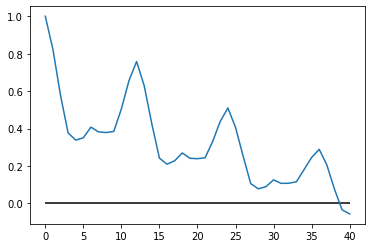

In [215]:
nlags=40
cor = acf(df.notrend, nlags=nlags)
plt.plot(cor)
plt.hlines(y=0, xmin=0, xmax=nlags)


## Partial autocorrelation function

 
We have a series $\{x_1, .., x_n\}$. 

The partial autocorrelation function works as follows

+ lag=0 => output 1
+ lag=1 => output correlation($\{x_1, .., x_{n-1}\}$, $\{x_2, .., x_{n}\}$). 

  Let $S_1=\{x_1, .., x_{n-1}\}$, $S_k=\{x_1, .., x_{n-k}\}$.
  
  Let $R_1=\{x_2, .., x_{n}\}$.
  
+ lag=2 => output correlation($S_2, R_2$)

  where $R_2$ is the list of residus (with the first element removed) when you perform linear regression with $S_1$ as input data and $R_1$ as target.
  
+ lag=3 => output correlation($S_3, R_3$)

  where $R_3$ is the list of residus (with the first element removed) when you perform linear regression with $S_2$ as input data and $R_2$ as target.
  
+ etc.

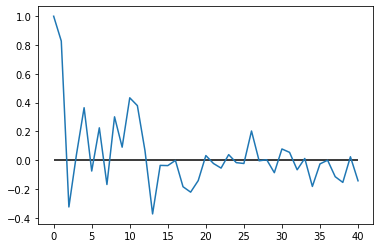

In [216]:
from statsmodels.tsa.stattools import pacf
pcor = pacf(df.notrend)
plt.plot(pcor)
plt.hlines(y=0, xmin=0, xmax=40)

In [217]:
pcor

array([ 1.00000000e+00,  8.27802207e-01, -3.24520580e-01,  4.12793168e-02,
        3.64726508e-01, -7.49713776e-02,  2.25047507e-01, -1.68594741e-01,
        3.01475477e-01,  9.07315154e-02,  4.33530100e-01,  3.79343131e-01,
        6.65368116e-02, -3.72858385e-01, -3.57793800e-02, -3.72438383e-02,
       -1.17991245e-03, -1.84053576e-01, -2.21691851e-01, -1.41217215e-01,
        3.25151802e-02, -2.26418781e-02, -5.46328019e-02,  3.88056943e-02,
       -1.67109189e-02, -2.26827686e-02,  2.02931417e-01, -3.86771988e-03,
        3.30107790e-03, -8.64893075e-02,  7.82042053e-02,  5.46654087e-02,
       -6.63501396e-02,  1.22014001e-02, -1.81963964e-01, -2.54534293e-02,
       -1.47896002e-05, -1.14280182e-01, -1.53988383e-01,  2.41254051e-02,
       -1.42838290e-01])

In [218]:
pcor.shape

(41,)

## Autoregressive regression

The next step is a linear function of previous steps:
$$X_t = c + \sum_{i=1}^p \varphi_i X_{t-i} + \epsilon_t$$
where c is a constant and ${\epsilon_t}$ are white noise terms.

It's similar to linear regression. 

Notation: AR(p) where p is the number of previous steps used in the model.


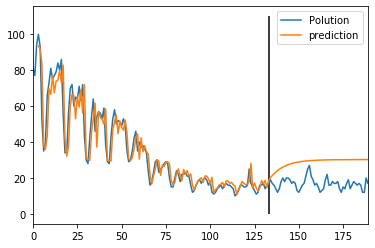

In [219]:
from statsmodels.tsa.ar_model import AR
# fit
train_limit=133
p=3
model = AR(df['Polution'][0:train_limit])
model_fit = model.fit(p)
# predict
df['prediction'] = model_fit.predict(p, len(df['Polution']))
df[['Polution', 'prediction']].plot()
plt.vlines(x=train_limit, ymin=0, ymax=110)


## Moving Average model

The next is a linear function of the white noise terms from a mean process at prior time steps.

It's different from computing the moving average.

$$X_t = \mu + \sum_{i=1}^q \theta_i \epsilon_{t-i} + \epsilon_t$$

Notation: MA(q)

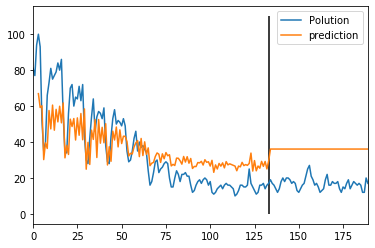

In [220]:
from statsmodels.tsa.arima_model import ARMA
# fit
train_limit=133
q=1
model = ARMA(df['Polution'][0:train_limit], order=(0, q))
model_fit = model.fit(disp=False)
# predict
df['prediction'] = model_fit.predict(p, len(df['Polution']))
df[['Polution', 'prediction']].plot()
plt.vlines(x=train_limit, ymin=0, ymax=110)


## Autoregressive Moving Average

Combination of AR and MA:

$$X_t = c + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \theta_i\epsilon_{t-i} + \epsilon_t$$

This model is suitable for univariate time series without trend and seasonal components.

Notation: ARMA(p, q)

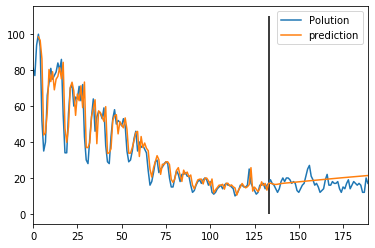

In [221]:
from statsmodels.tsa.arima_model import ARMA
# fit
train_limit=133
p=3
q=1
model = ARMA(df['Polution'][0:train_limit], order=(p, q))
model_fit = model.fit(disp=False)
# predict
df['prediction'] = model_fit.predict(p, len(df['Polution']))
df[['Polution', 'prediction']].plot()
plt.vlines(x=train_limit, ymin=0, ymax=110)

## Autoregressive Integrated Moving Average

"Intergrated" means that the process (series) is replaced: each value is replaced with the difference between itself and the previous value. This step is called defferencing.

We expect that after often one (or several) initial defferencing step, the new series is stationary.

Example: If $X_t = X_{t-1} + e_t$ then after differencing once, the series is stationary (suppose that $\{e_t\}$ is iid).

The number of differencing steps d is called the degree of differencing.

The integrated part allows the model to work with trends.

ARIMA is applied when the series doesn't seem to be stationary.

Notation: ARIMA(p,d,q)

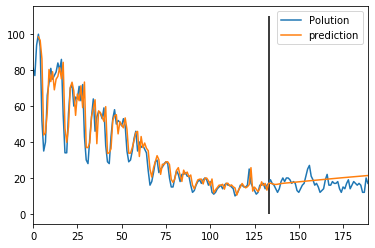

In [222]:
from statsmodels.tsa.arima_model import ARIMA
# fit
train_limit=133
p=3
d=1
q=1
model = ARMA(df['Polution'][0:train_limit], order=(p, d, q))
model_fit = model.fit(disp=False)
# predict
df['prediction'] = model_fit.predict(p, len(df['Polution']))
df[['Polution', 'prediction']].plot()
plt.vlines(x=train_limit, ymin=0, ymax=110)

## Seasonal Autoregressive Integrated Moving-Average 

Add seasonal elements to ARIMA. New parameters are: (P, D, Q, m)

+ m: The length of a single period (number of time steps), m=12 for monthly data for example.
+ P: P=1 uses the first seasonally offset observation i.e. $t-m$; P=2 uses the last two seasonally offset observations $t-m, t-2m$.
+ D=1 would calculate a first order seasonal difference
+ Q=1 would use a first order errors in the model.

This moel is applied to univariate time series with trend and seasonality.
 
Notation: SARIMA(p, d, q)(P, D, Q, m)

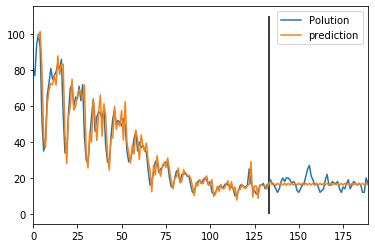

In [223]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit
train_limit=133
p, d, q = 3,1, 1
P, D, Q, m = 1, 1, 1, 12
model = SARIMAX(df['Polution'][0:train_limit], order=(p, d, q),
                sesonal_order=(P, D, Q, m))
model_fit = model.fit(disp=False)
# predict
df['prediction'] = model_fit.predict(p, len(df['Polution']))
df[['Polution', 'prediction']].plot()
plt.vlines(x=train_limit, ymin=0, ymax=110)

## Rolling forecast

As we can see the prediction as we do so far doesn't take into account the new test data (it doesn't use the previous time steps to predict the next step in test data).

One crude way to perform rolling forecast is to fit a new SARIMA model for each steps in the test data, which is fitted with all the history data.

Extra task: Write a code to perform rolling forecast.

# Part 4: Machine learning

We will use the same data to apply machine learning.

In [224]:
df.head()

,Month,Polution,notrend,trend,prediction
0,2004-01,81,21.998788,59.001212,NaN
1,2004-02,77,18.303507,58.696493,NaN
2,2004-03,94,35.608226,58.391774,NaN
3,2004-04,100,41.912945,58.087055,98.364790
4,2004-05,93,35.217664,57.782336,101.511674


### Lags

We use the previouse steps as input features for machine learning:

In [0]:
lags_list=[]
for i in range(12):
  lags_list.append('lag{}'.format(i+1))
  df['lag{}'.format(i+1)]=df['Polution'].shift(i+1)

In [226]:
df.head()

,Month,Polution,notrend,trend,prediction,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
0,2004-01,81,21.998788,59.001212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-02,77,18.303507,58.696493,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-03,94,35.608226,58.391774,NaN,77.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-04,100,41.912945,58.087055,98.364790,94.0,77.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-05,93,35.217664,57.782336,101.511674,100.0,94.0,77.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
print(lags_list)

['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12']


### Split

In [0]:
x = df[lags_list][12:]
y = df['Polution'][12:]

split = 0.7
split_index = int(split * len(y))

x_train = x[:split_index]
x_test = x[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

In [229]:
x_train.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
12,75.0,81.0,73.0,66.0,40.0,35.0,52.0,93.0,100.0,94.0,77.0,81.0
13,77.0,75.0,81.0,73.0,66.0,40.0,35.0,52.0,93.0,100.0,94.0,77.0
14,79.0,77.0,75.0,81.0,73.0,66.0,40.0,35.0,52.0,93.0,100.0,94.0
15,84.0,79.0,77.0,75.0,81.0,73.0,66.0,40.0,35.0,52.0,93.0,100.0
16,80.0,84.0,79.0,77.0,75.0,81.0,73.0,66.0,40.0,35.0,52.0,93.0


### Linear regression


In [230]:
# Create a linear model and train
from sklearn.linear_model import LinearRegression

linR = LinearRegression()
linR.fit(X=x_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predict
train_pred = linR.predict(x_train)
test_pred = linR.predict(x_test)

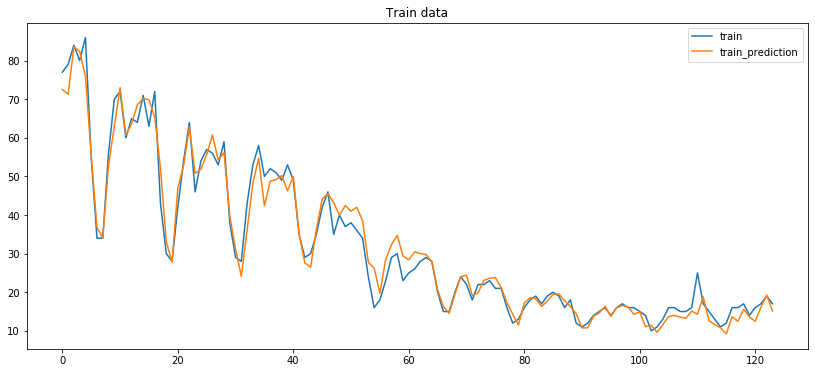

In [232]:
# Plot prediction with train data
plt.figure(figsize=(14,6))
plt.title('Train data')
plt.plot(range(len(y_train)), y_train, label='train')
plt.plot(range(len(train_pred)), train_pred, label='train_prediction')
plt.legend()

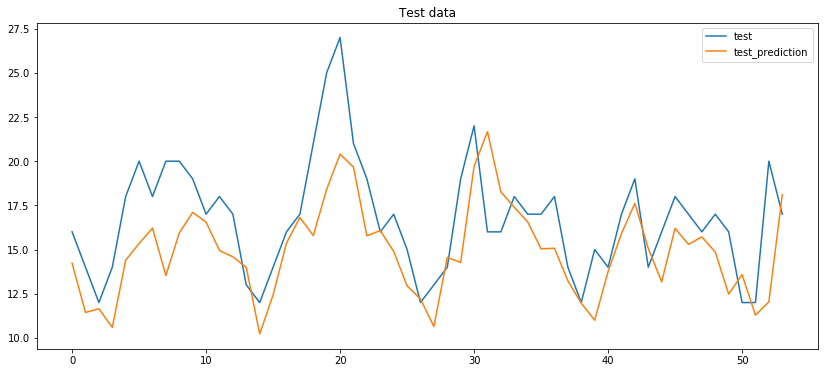

In [233]:
# Plot prediction with test data
plt.figure(figsize=(14,6))
plt.title('Test data')
plt.plot(range(len(y_test)), y_test, label='test')
plt.plot(range(len(test_pred)), test_pred, label='test_prediction')

plt.legend()

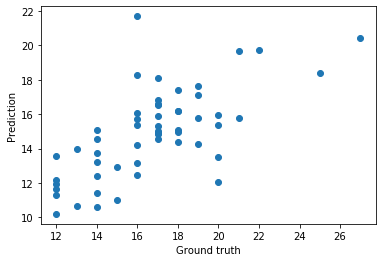

In [234]:
plt.ylabel('Prediction')
plt.xlabel('Ground truth')
plt.scatter(y_test, test_pred)

In [235]:
# R squared score for test data
linR_r2_test = linR.score(x_test, y_test)
linR_r2_test

0.10089018376970738

In [236]:
# R squared score for train data
linR_r2_train = linR.score(x_train, y_train)
linR_r2_train

0.9690621988798122

### Neural network 1

Task: Do the same things as in the section "Linear regression" but with a fully connected neural network using keras. 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

In [0]:
#define the r squared function
def r2(y_true, y_pred):
    sc_res =  K.sum(K.square(y_true - y_pred))
    sct = K.sum(K.square( y_true - K.mean(y_true)))
    return ( 1 - sc_res/(sct + K.epsilon()) )

In [239]:
fnn = Sequential()
fnn.add(Dense(32, input_dim = x_train.shape[1], activation='relu'))
fnn.add(Dense(1, activation='linear'))

fnn.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(lr=0.01), metrics=[r2])
fnn.summary()

batch_size = 10
epochs = 100
fnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 - 1s - loss: 1369.6922 - r2: -3.4534e+00
Epoch 2/100
 - 0s - loss: 225.0675 - r2: 0.1526
Epoch 3/100
 - 0s - loss: 117.0681 - r2: 0.6699
Epoch 4/100
 - 0s - loss: 61.3451 - r2: 0.7789
Epoch 5/100
 - 0s - loss: 55.6722 - r2: 0.7921
Epoch 6/100
 - 0s - loss: 50.3526 - r2: 0.8315
Epoch 7/100
 - 0s - loss: 47.3150 - r2: 0.6581
Epoch 8/100
 - 0s - loss: 44.5186 - r2: 0.7811
Epoch 9/100
 - 0s - loss: 41.8676 - r2: 0.8007
Epoch 10/100
 - 0s - loss: 39.8922 - r2: 0.7708
Epoch 11/100
 - 0s - loss: 37.0688 - r

In [0]:
# Predict
fnn_train_pred = fnn.predict(x_train)
fnn_test_pred = fnn.predict(x_test)

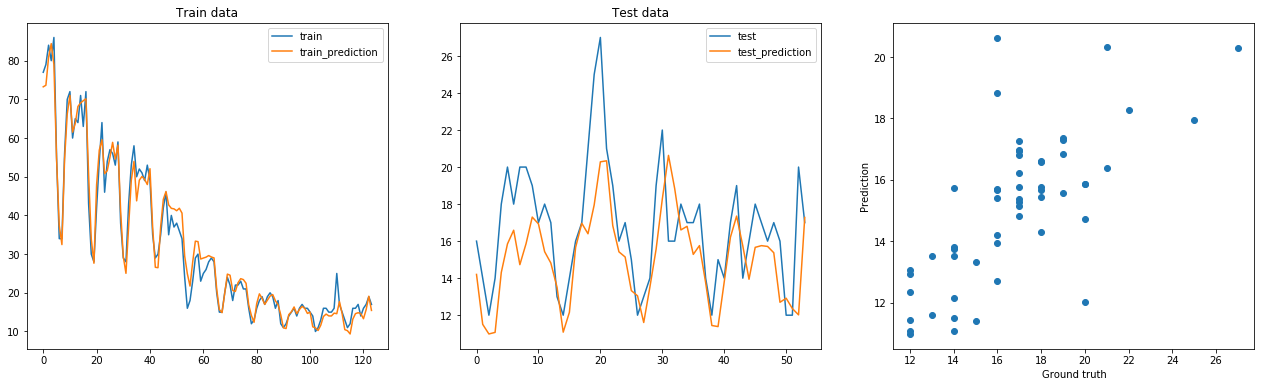

In [241]:
def plot_data(y_train, y_test, fnn_train_pred, fnn_test_pred) : 
  # Plot prediction with train data
  plt.figure(figsize=(22,6))
  plt.subplot(131, title='Train data')
  plt.plot(range(len(y_train)), y_train, label='train')
  plt.plot(range(len(train_pred)), fnn_train_pred, label='train_prediction')
  plt.legend()

  # Plot prediction with test data
  plt.subplot(132, title ='Test data')
  plt.plot(range(len(y_test)), y_test, label='test')
  plt.plot(range(len(test_pred)), fnn_test_pred, label='test_prediction')
  plt.legend()

  plt.subplot(133)
  plt.ylabel('Prediction')
  plt.xlabel('Ground truth')
  plt.scatter(y_test, fnn_test_pred)

plot_data(y_train, y_test, fnn_train_pred, fnn_test_pred)

In [242]:
# R squared score for test data
_, fnn_r2_test = fnn.evaluate(x_test, y_test)
# R squared score for train data
_, fnn_r2_train = fnn.evaluate(x_train, y_train)
print("r2 for train data : ", fnn_r2_train, "\nr2 for test data : ", fnn_r2_test)

124/124 [==============================] - 0s 52us/step
r2 for train data :  0.7425320859878294 
r2 for test data :  0.07825700883512143


### Neural network 2
Task: try to improve your neural network in the previous task.

In [0]:
from keras.layers import Dropout

In [244]:
fnn2 = Sequential()
fnn2.add(Dense(8, input_dim = x_train.shape[1], activation='relu'))
fnn2.add(Dropout(0.2))
fnn2.add(Dense(4))
fnn2.add(Dense(1, activation='linear'))

fnn2.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(lr=0.001), metrics=[r2])
fnn2.summary()

batch_size = 5
epochs = 200
fnn2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 104       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
 - 1s - loss: 2508.7459 - r2: -1.3091e+01
Epoch 2/200
 - 0s - loss: 1374.5552 - r2: -6.3452e+00
Epoch 3/200
 - 0s - loss: 526.7595 - r2: -1.9235e+00
Epoch 4/200
 - 0s - loss: 291.4226 - r2: -8.1248e-01
Epoch 5/200
 - 0s - loss: 295.9677 - r2

In [0]:
from sklearn.model_selection import GridSearchCV

In [246]:
"""param_grid = {'activation': ['relu','linear','sigmoid','softmax'],
              'units': [8,16,32,64]}

fnn2 = Sequential()
gridsearch = GridSearchCV(fnn2, param_grid, cv = 5, verbose= 1)
gridsearch.fit(x_train, y_train)

print("The best parameters are:\n%s" % (gridsearch.best_params_)) 
print("The best score is:\n%s" % (gridsearch.best_score_))"""

'param_grid = {\'activation\': [\'relu\',\'linear\',\'sigmoid\',\'softmax\'],\n              \'units\': [8,16,32,64]}\n\nfnn2 = Sequential()\ngridsearch = GridSearchCV(fnn2, param_grid, cv = 5, verbose= 1)\ngridsearch.fit(x_train, y_train)\n\nprint("The best parameters are:\n%s" % (gridsearch.best_params_)) \nprint("The best score is:\n%s" % (gridsearch.best_score_))'

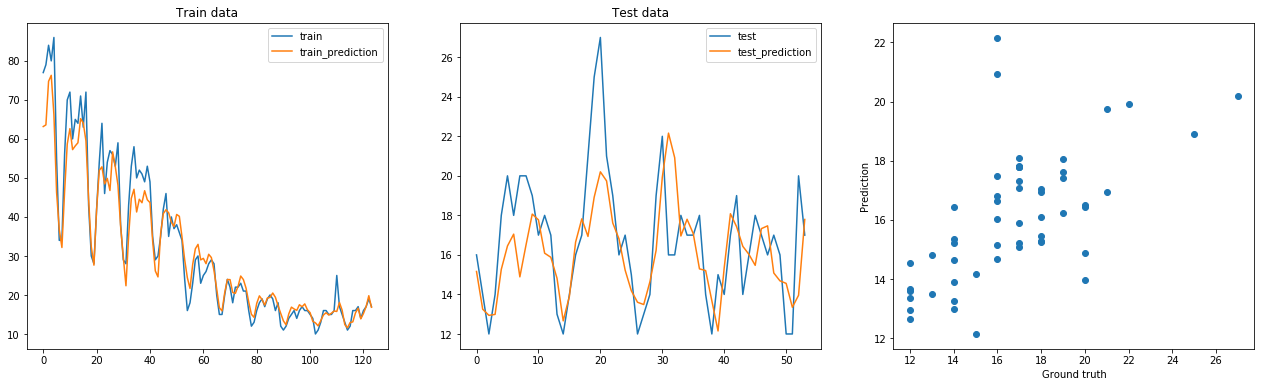

In [247]:
# Predict
fnn2_train_pred = fnn2.predict(x_train)
fnn2_test_pred = fnn2.predict(x_test)
plot_data(y_train, y_test, fnn2_train_pred, fnn2_test_pred)

In [248]:
_, fnn2_r2_test = fnn2.evaluate(x_test, y_test)
_, fnn2_r2_train = fnn2.evaluate(x_train, y_train)
print("r2 for train data : ", fnn2_r2_train, "\nr2 for test data : ", fnn2_r2_test)

124/124 [==============================] - 0s 48us/step
r2 for train data :  0.714470632614628 
r2 for test data :  0.2058613035413954


### A baseline

It's good to have a baseline model to evaluate your progress. One baseline model for time series could be "Tomorrow will be like today".

Task: write a baseline model where prediction for the next step is the current step. Plot the prediction for train and test data. Compute the R squared score for train and test data. Compare the result with your neural network.




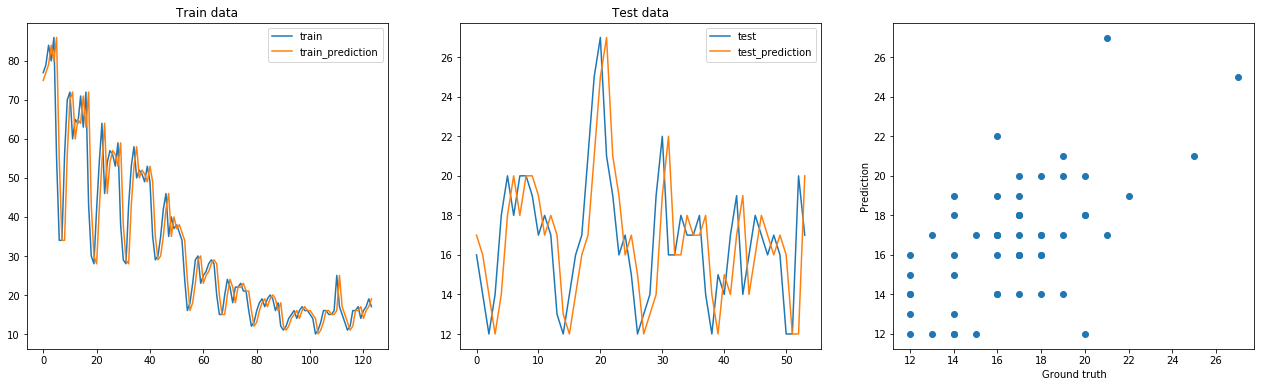

In [249]:
by_train_pred = x_train['lag1']
by_test_pred = x_test['lag1']

plot_data(y_train, y_test, by_train_pred, by_test_pred)

In [0]:
def np_r2(y_true, y_pred):
    sc_res =  np.sum(np.square(y_true - y_pred))
    sct = np.sum(np.square( y_true - np.mean(y_true)))
    return ( 1 - sc_res/(sct + 10**-7) )

In [251]:
b_r2_train = np_r2(y_train, by_train_pred)
b_r2_test = np_r2(y_test, by_test_pred)
print("r2 for train data : ", b_r2_train, "\nr2 for test data : ", b_r2_test)

r2 for train data :  0.859118916880037 
r2 for test data :  0.21695898371179456


### Neural network 3 - CNN

Task: Create a CNN. For train and test data, plot the data and the predictions, compute R squared. 

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape

In [253]:
cnn = Sequential()
cnn.add(Reshape((1,x_train.shape[1],1)))
cnn.add(Conv2D(32, (1, 5), input_shape=(1,x_train.shape[1],1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(1, 2), strides=2))
cnn.add(Conv2D(64, (1, 3), input_shape=(1,x_train.shape[1],1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(1, 2), strides=2))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(1, activation='linear'))

cnn.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(lr=0.001), metrics=[r2])

batch_size = 5
epochs = 100
cnn.fit(np.array(x_train), np.array(y_train), epochs=epochs, batch_size=batch_size, verbose=2)
cnn.summary()

Epoch 1/100
 - 1s - loss: 584.7577 - r2: -2.5588e+00
Epoch 2/100
 - 0s - loss: 115.5284 - r2: 0.6006
Epoch 3/100
 - 0s - loss: 76.4639 - r2: 0.1397
Epoch 4/100
 - 0s - loss: 83.8164 - r2: 0.2466
Epoch 5/100
 - 0s - loss: 63.9222 - r2: 0.5708
Epoch 6/100
 - 0s - loss: 57.1564 - r2: 0.4679
Epoch 7/100
 - 0s - loss: 52.8783 - r2: 0.6511
Epoch 8/100
 - 0s - loss: 49.4204 - r2: 0.5066
Epoch 9/100
 - 0s - loss: 46.7896 - r2: 0.6748
Epoch 10/100
 - 0s - loss: 44.6694 - r2: 0.5480
Epoch 11/100
 - 0s - loss: 48.3187 - r2: 0.5287
Epoch 12/100
 - 0s - loss: 39.8867 - r2: 0.7330
Epoch 13/100
 - 0s - loss: 40.0612 - r2: 0.7795
Epoch 14/100
 - 0s - loss: 35.8528 - r2: 0.5429
Epoch 15/100
 - 0s - loss: 32.3384 - r2: 0.3551
Epoch 16/100
 - 0s - loss: 29.1647 - r2: 0.6768
Epoch 17/100
 - 0s - loss: 27.6506 - r2: 0.7159
Epoch 18/100
 - 0s - loss: 26.0096 - r2: 0.8855
Epoch 19/100
 - 0s - loss: 33.1514 - r2: 0.7039
Epoch 20/100
 - 0s - loss: 24.1340 - r2: 0.7841
Epoch 21/100
 - 0s - loss: 21.6053 - r2: 0

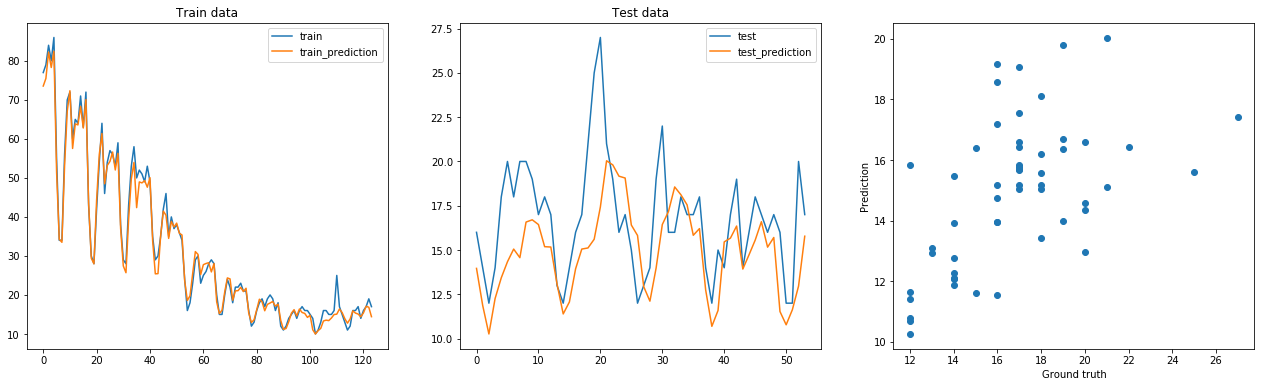

In [254]:
# Predict
cnn_train_pred = cnn.predict(x_train)
cnn_test_pred = cnn.predict(x_test)
# Plot
plot_data(y_train, y_test, cnn_train_pred, cnn_test_pred)

In [255]:
_, cnn_r2_train = cnn.evaluate(x_train, y_train)
_, cnn_r2_test = cnn.evaluate(x_test, y_test)
print("r2 for train data : ", cnn_r2_train, "\nr2 for test data : ", cnn_r2_test)

54/54 [==============================] - 0s 81us/step
r2 for train data :  0.8003881881313939 
r2 for test data :  -0.12353284712190982


### Neural network 4 - RNN

Task: Create a RNN. For train and test data, plot the data and the predictions, compute R squared.

In [0]:
from keras.layers import LSTM

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing.

In [257]:
from sklearn.preprocessing import MinMaxScaler
 
np.random.seed(42)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = df[lags_list+['Polution']][12:]
dataset = scaler.fit_transform(dataset)
dataset

array([[0.85526316, 0.93421053, 0.82894737, ..., 0.74444444, 0.78888889,
        0.88157895],
       [0.88157895, 0.85526316, 0.93421053, ..., 0.93333333, 0.74444444,
        0.90789474],
       [0.90789474, 0.88157895, 0.85526316, ..., 1.        , 0.93333333,
        0.97368421],
       ...,
       [0.02631579, 0.07894737, 0.09210526, ..., 0.04444444, 0.05555556,
        0.02631579],
       [0.02631579, 0.02631579, 0.07894737, ..., 0.07777778, 0.04444444,
        0.13157895],
       [0.13157895, 0.02631579, 0.02631579, ..., 0.1       , 0.07777778,
        0.09210526]])

In [258]:
dataset.shape

(178, 13)

In [0]:
x = dataset[:,:12]
y = dataset[:,-1]

trainX = x[:split_index]
testX = x[split_index:]
trainY = y[:split_index]
testY = y[split_index:]

In [260]:
print(trainX.shape, testY.shape)
trainX = trainX.reshape((trainX.shape[0],1,trainX.shape[1]))
testX = testX.reshape((testX.shape[0],1,testX.shape[1]))
print(trainX.shape, testX.shape)

(124, 12) (54,)
(124, 1, 12) (54, 1, 12)


In [261]:
batch_size = 8
epochs = 100

rnn = Sequential()
rnn.add(LSTM(10, return_sequences=True, input_shape=(1, trainX.shape[2])))
rnn.add(LSTM(1, dropout=0.25))
rnn.add(Dense(1, activation='tanh'))

rnn.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.rmsprop(), metrics=[r2])

rnn.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=2)
rnn.summary()

Epoch 1/100
 - 3s - loss: 0.1459 - r2: -1.4939e+00
Epoch 2/100
 - 0s - loss: 0.1061 - r2: -1.0303e+00
Epoch 3/100
 - 0s - loss: 0.0762 - r2: -2.7088e-01
Epoch 4/100
 - 0s - loss: 0.0586 - r2: 0.0712
Epoch 5/100
 - 0s - loss: 0.0456 - r2: 0.0843
Epoch 6/100
 - 0s - loss: 0.0396 - r2: 0.2597
Epoch 7/100
 - 0s - loss: 0.0314 - r2: 0.4900
Epoch 8/100
 - 0s - loss: 0.0315 - r2: 0.4601
Epoch 9/100
 - 0s - loss: 0.0257 - r2: -3.0299e-01
Epoch 10/100
 - 0s - loss: 0.0233 - r2: 0.5437
Epoch 11/100
 - 0s - loss: 0.0227 - r2: 0.6499
Epoch 12/100
 - 0s - loss: 0.0198 - r2: 0.6907
Epoch 13/100
 - 0s - loss: 0.0160 - r2: 0.6269
Epoch 14/100
 - 0s - loss: 0.0149 - r2: 0.7259
Epoch 15/100
 - 0s - loss: 0.0151 - r2: 0.7065
Epoch 16/100
 - 0s - loss: 0.0159 - r2: 0.7187
Epoch 17/100
 - 0s - loss: 0.0135 - r2: 0.7583
Epoch 18/100
 - 0s - loss: 0.0118 - r2: 0.7045
Epoch 19/100
 - 0s - loss: 0.0125 - r2: 0.5765
Epoch 20/100
 - 0s - loss: 0.0126 - r2: 0.7484
Epoch 21/100
 - 0s - loss: 0.0101 - r2: 0.8295
Ep

Once the model is fit, we can invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data.

In [0]:
# Predict
rnn_train_pred = rnn.predict(trainX)
rnn_test_pred = rnn.predict(testX)

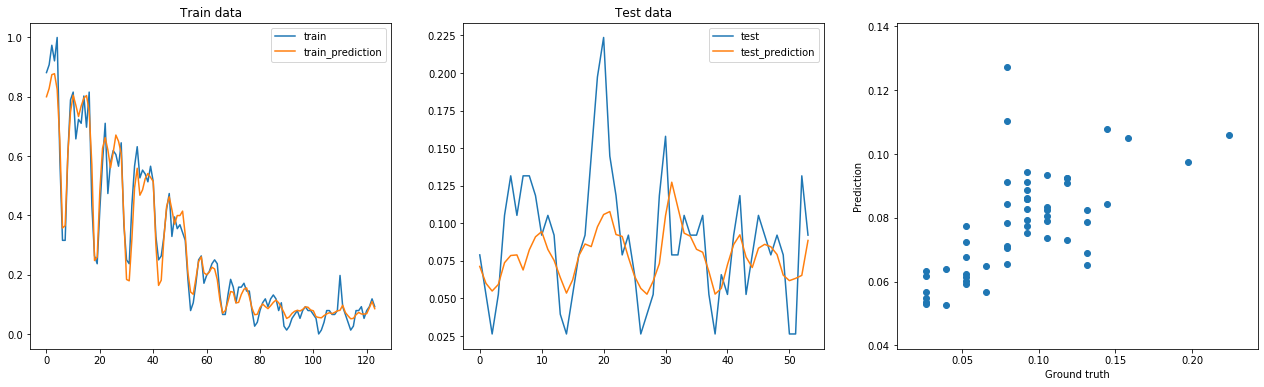

In [263]:
# Plot
plot_data(trainY, testY, rnn_train_pred, rnn_test_pred)

In [264]:
_, rnn_r2_train = rnn.evaluate(trainX, trainY)
_, rnn_r2_test = rnn.evaluate(testX, testY)
print("r2 for train data : ", rnn_r2_train, "\nr2 for test data : ", rnn_r2_test)

54/54 [==============================] - 0s 87us/step
r2 for train data :  0.7401734763576139 
r2 for test data :  0.27479091397038213


### Models summary

In [265]:
print("   Model\t\t| Baseline\t| LinReg\t| FNN\t\t| FNN 2\t\t| CNN\t\t| RNN\n","-"*120,
      "\n   r2 for train data\t| %.2f\t\t| %.2f\t\t| %.2f\t\t| %.2f\t\t| %.2f\t\t| %.2f" % (b_r2_train,linR_r2_train,fnn_r2_train,fnn2_r2_train,cnn_r2_train,rnn_r2_train),
      "\n   r2 for test data\t| %.2f\t\t| %.2f\t\t| %.2f\t\t| %.2f\t\t| %.2f\t\t| %.2f" % (b_r2_test,linR_r2_test,fnn_r2_test,fnn2_r2_test,cnn_r2_test,rnn_r2_test))

   Model		| Baseline	| LinReg	| FNN		| FNN 2		| CNN		| RNN
 ------------------------------------------------------------------------------------------------------------------------ 
   r2 for train data	| 0.86		| 0.97		| 0.74		| 0.71		| 0.80		| 0.74 
   r2 for test data	| 0.22		| 0.10		| 0.08		| 0.21		| -0.12		| 0.27
